#Fake News Classifier

##Objective:

In this Project we will be creating the Fake News Classifier uisng NLP techniques like BOW, Tf-Idf , Word2Vec, and then classfiy the news that are passing is a fake or a genuine news.

In [0]:
#importing important libraries

import pandas as pd


In [0]:
data = pd.read_csv('/content/train.csv',sep=',')

In [0]:
#getting the independent features
X = data.drop('label',axis=1)

In [0]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [0]:
y=data['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [0]:
data.shape

(18285, 5)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [0]:
data=data.dropna()

In [0]:
messages=data.copy()

In [0]:
data.shape

(18285, 5)

In [0]:
messages.reset_index(inplace=True)

In [0]:
messages.tail()

,index,id,title,author,text,label
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
18284,20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [0]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
import regex as re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
  review=review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)


In [0]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [0]:
#Applying CountVectorizer
#Creating bag of words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x= cv.fit_transform(corpus).toarray()

In [0]:
x.shape

(18285, 5000)

In [0]:
y=messages['label']

In [0]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [0]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [0]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [0]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names())

In [0]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


**MultiNomialNB Algorithm**

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [0]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


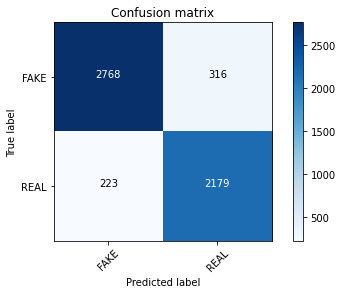

In [0]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [0]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9017499088589136

In [0]:

y_train.shape

(12799,)

**Passive Aggressive Classifier Algorithm**

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.916
Confusion matrix, without normalization


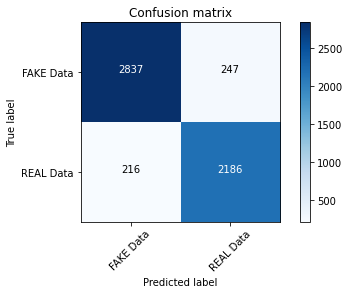

In [0]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**Multinomial Classifier with Hyperparameter**

In [0]:
classifier=MultinomialNB(alpha=0.1)

In [0]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8904484141450966
Alpha: 0.1, Score : 0.9030258840685381
Alpha: 0.2, Score : 0.9030258840685381
Alpha: 0.30000000000000004, Score : 0.9026613197229311
Alpha: 0.4, Score : 0.9019321910317171
Alpha: 0.5, Score : 0.9024790375501276
Alpha: 0.6000000000000001, Score : 0.9028436018957346
Alpha: 0.7000000000000001, Score : 0.9035727305869486
Alpha: 0.8, Score : 0.9030258840685381
Alpha: 0.9, Score : 0.9032081662413416


In [0]:
## Get Features names
feature_names = cv.get_feature_names()

In [0]:

classifier.coef_[0]

array([ -9.13851551,  -8.66088795,  -9.13851551, ..., -10.83311123,
        -8.7962293 ,  -9.36677416])

In [0]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9920894686099926, 'trump'),
 (-4.283778449404154, 'hillari'),
 (-4.375295545839294, 'clinton'),
 (-4.8873997935153906, 'elect'),
 (-5.144630412704637, 'new'),
 (-5.239226293337629, 'comment'),
 (-5.272857037363478, 'video'),
 (-5.400360096919867, 'war'),
 (-5.400360096919867, 'us'),
 (-5.400360096919867, 'hillari clinton'),
 (-5.434948525093684, 'fbi'),
 (-5.450146386003116, 'vote'),
 (-5.535349569997123, 'email'),
 (-5.592540682275724, 'world'),
 (-5.628494225203827, 'obama'),
 (-5.717782305845059, 'donald'),
 (-5.751706861626975, 'donald trump'),
 (-5.7656056260177895, 'russia'),
 (-5.868713801008469, 'day'),
 (-5.868713801008469, 'america')]

**Performing TfIdf in the text attribute of the Document**

In [0]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [0]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [0]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [0]:
X.shape

(18285, 5000)

In [0]:
y=messages['label']

In [0]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [0]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [0]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [0]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [0]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,absolut,absorb,absurd,abu,abus,academ,academi,acceler,accept,access,access pipelin,accid,accommod,accompani,accomplish,accord,accord report,account,accumul,accur,accus,achiev,acid,acknowledg,acquir,acr,across,across countri,act,action,...,written,wrong,wrongdo,wrote,wrote twitter,www,xi,yahoo,yard,ye,yeah,year,year ago,year later,year mr,year old,year said,year sinc,yell,yellow,yemen,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york time,yorker,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.054002,0.0,0.000000,0.0,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.053056,0.054919,0.055677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017844,0.036376,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.235377,0.028303,0.0,0.037869,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.014089,0.0,0.00000,0.009599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076513,0.008209,0.0,0.0,0.010306,0.0,0.0,0.0,0.0,0.0,0.0,0.006608,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039097,0.0,0.053839,0.000000,0.0,0.05569,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215889,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


accuracy:   0.901
Confusion matrix, without normalization


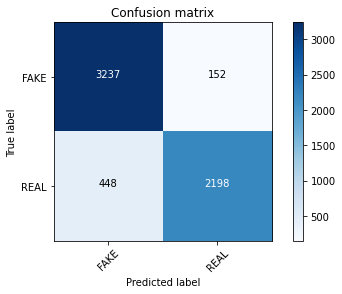

In [0]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [0]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9005799502899752

In [0]:
y_train.shape

(12250,)

**Passive Aggressive Classifier Algorithm**

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.951
Confusion matrix, without normalization


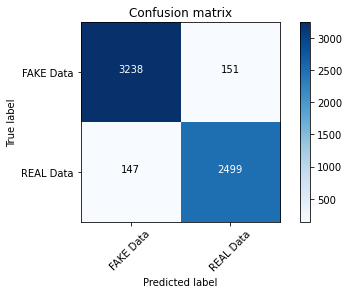

In [0]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**Multinomial Classifier with Hyperparameter**

In [0]:
classifier=MultinomialNB(alpha=0.1)

In [0]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.9022369511184756
Alpha: 0.1, Score : 0.9017398508699255
Alpha: 0.2, Score : 0.9020712510356255
Alpha: 0.30000000000000004, Score : 0.9022369511184756
Alpha: 0.4, Score : 0.9020712510356255
Alpha: 0.5, Score : 0.9014084507042254
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9012427506213753
Alpha: 0.8, Score : 0.9009113504556753
Alpha: 0.9, Score : 0.9005799502899752


In [0]:
## Get Features names
feature_names = cv.get_feature_names()

In [0]:
classifier.coef_[0]

array([-9.52147382, -8.98567005, -8.75019038, ..., -9.00768675,
       -8.29304531, -8.47560634])

In [0]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.400573176146374, 'classifi'),
 (-5.504449523154856, 'trump victori'),
 (-5.689699395630465, 'higher'),
 (-5.927658316663332, 'vertic'),
 (-5.943924155634382, 'elect fraud'),
 (-6.141141898356725, 'pearl'),
 (-6.153679149791046, 'war crime'),
 (-6.1855372689534684, 'stress'),
 (-6.209385038898738, 'elimin'),
 (-6.231070569259119, 'offici say new'),
 (-6.304754452471091, 'highest'),
 (-6.30763946084777, 'feast'),
 (-6.325864550609382, 'worldwid'),
 (-6.334934576217139, 'liber'),
 (-6.373788650596871, 'ami'),
 (-6.392869520601681, 'tri hack'),
 (-6.398029580588211, 'wast'),
 (-6.415258514684247, 'work new york'),
 (-6.450564452209334, 'year old girl'),
 (-6.459455119306126, 'obamacar design')]

In [0]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.991740188222842, 'broken'),
 (-10.991740188222842, 'foe'),
 (-10.991740188222842, 'fold'),
 (-10.991740188222842, 'gold'),
 (-10.991740188222842, 'gop'),
 (-10.991740188222842, 'judg jeanin'),
 (-10.991740188222842, 'kerri'),
 (-10.991740188222842, 'kevin'),
 (-10.991740188222842, 'money new york'),
 (-10.991740188222842, 'mostli'),
 (-10.991740188222842, 'mother'),
 (-10.991740188222842, 'mount'),
 (-10.991740188222842, 'mourn'),
 (-10.991740188222842, 'move embassi'),
 (-10.991740188222842, 'moveabl'),
 (-10.991740188222842, 'moveabl feast cafe'),
 (-10.991740188222842, 'mp'),
 (-10.991740188222842, 'muhammad'),
 (-10.991740188222842, 'multipl'),
 (-10.991740188222842, 'mulvaney'),
 (-10.991740188222842, 'murder'),
 (-10.991740188222842, 'museum'),
 (-10.991740188222842, 'muslim brotherhood'),
 (-10.991740188222842, 'muslim invad'),
 (-10.991740188222842, 'palin'),
 (-10.991740188222842, 'palm'),
 (-10.991740188222842, 'pan'),
 (-10.991740188222842, 'quebec'),
 (-10.99174018822

**HashingVectorizer**

In [0]:
hs_vectorizer=HashingVectorizer(n_features=5000,binary=True)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [0]:
X.shape

(18285, 5000)

In [0]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.855
Confusion matrix, without normalization


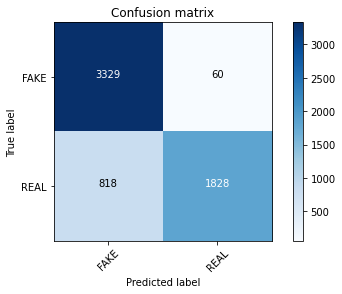

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Fake News Classifier Using LSTM**

In [0]:
data_lstm = pd.read_csv('/content/train.csv',sep=',')

In [0]:
###Drop Nan Values
data_lstm=data_lstm.dropna()

In [0]:
## Get the Independent Features

X=data_lstm.drop('label',axis=1)

In [0]:
# Get the Dependent features
y=data_lstm['label']

In [0]:
print('The shape of X is {} and y is {}'.format(X.shape,y.shape))

The shape of X is (18285, 4) and y is (18285,)


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0'

In [0]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [0]:

### Vocabulary size
voc_size=5000

**Onehot Representation**

In [0]:
messages=X.copy()

In [0]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [0]:
messages.reset_index(inplace=True)

In [0]:
import nltk
import re
from nltk.corpus import stopwords

In [0]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
1

In [0]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [0]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3545, 4495, 603, 4987, 1215, 2455, 4964, 1468, 1089, 1733],
 [1528, 3031, 86, 693, 3477, 525, 1075],
 [1262, 1453, 1531, 4713],
 [3276, 1051, 1575, 2125, 1397, 4987],
 [2723, 3477, 3695, 616, 2092, 1519, 3477, 3388, 1522, 1117],
 [1720,
  1600,
  4454,
  1747,
  2033,
  2865,
  1234,
  1830,
  4480,
  4172,
  4582,
  1556,
  1226,
  1445,
  1075],
 [3781, 1114, 4666, 3829, 3178, 347, 4603, 4433, 4903, 1311, 1213],
 [400, 91, 4265, 886, 144, 3224, 2865, 2562, 4903, 1311, 1213],
 [901, 236, 3657, 4442, 2417, 3228, 932, 1679, 2865, 1785],
 [4784, 4252, 611, 4181, 1220, 4994, 3252, 3908],
 [4724, 2842, 665, 4884, 3383, 2983, 2694, 3278, 3567, 4843, 1877],
 [2125, 938, 1215, 3228, 2865, 144],
 [893, 373, 468, 4685, 1320, 3903, 4091, 1884, 2259],
 [1196, 3930, 512, 576, 4364, 244, 3711, 4903, 1311, 1213],
 [4530, 3161, 1375, 4312, 3668, 4903, 1311, 1213],
 [205, 4690, 4241, 811, 2652, 3907, 1863, 487, 1082, 1284],
 [4673, 1346, 3031],
 [408, 854, 2678, 269, 2865, 4214, 3635, 1075],
 [3047,

**Embedding Representation**

In [0]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1468 1089 1733]
 [   0    0    0 ... 3477  525 1075]
 [   0    0    0 ... 1453 1531 4713]
 ...
 [   0    0    0 ... 4903 1311 1213]
 [   0    0    0 ... 3904 3542 1694]
 [   0    0    0 ...  256 3663 2694]]


In [0]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3545,
       4495,  603, 4987, 1215, 2455, 4964, 1468, 1089, 1733], dtype=int32)

In [0]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
len(embedded_docs),y.shape

(18285, (18285,))

In [0]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [0]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

**ModelTraining**

In [0]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 6s 33ms/step - loss: 0.3402 - accuracy: 0.8394 - val_loss: 0.1999 - val_accuracy: 0.9173
Epoch 2/10
192/192 [==============================] - 6s 30ms/step - loss: 0.1416 - accuracy: 0.9440 - val_loss: 0.1995 - val_accuracy: 0.9198
Epoch 3/10
192/192 [==============================] - 6s 31ms/step - loss: 0.1021 - accuracy: 0.9603 - val_loss: 0.2265 - val_accuracy: 0.9215
Epoch 4/10
192/192 [==============================] - 6s 30ms/step - loss: 0.0780 - accuracy: 0.9727 - val_loss: 0.2424 - val_accuracy: 0.9153
Epoch 5/10
192/192 [==============================] - 6s 30ms/step - loss: 0.0581 - accuracy: 0.9810 - val_loss: 0.2664 - val_accuracy: 0.9173
Epoch 6/10
192/192 [==============================] - 6s 30ms/step - loss: 0.0465 - accuracy: 0.9837 - val_loss: 0.3237 - val_accuracy: 0.9095
Epoch 7/10
192/192 [==============================] - 6s 30ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.4077 - val_accuracy: 0.9137

**Adding Dropouts**

In [0]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Performance Metrics And Accuracy**

In [0]:
y_pred=model.predict_classes(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(y_test,y_pred)

array([[3119,  300],
       [ 228, 2388]])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9125103562551782